# Librería Geopandas y Folium

<img src="https://geopandas.org/_static/geopandas_logo_web.svg" weigth="300px"/>

<img src="https://python-visualization.github.io/folium/_images/folium_logo.jpg" weigth="200px"/>



Web: https://geopandas.org/index.html, https://python-visualization.github.io/folium/index.html

Repo: https://github.com/geopandas/geopandas

Algunos notebooks: https://github.com/geopandas/geopandas/tree/master/doc/source/gallery

Como siempre, instalar este librería en el entorno virtual (depende de otras librerías)
```bash
(entorno)$ python3 -m pip install geopandas

...

Successfully installed click-plugins-1.1.1 cligj-0.7.2 fiona-1.8.20 geopandas-0.9.0 munch-2.5.0 pyproj-3.0.1 shapely-1.7.1 branca-0.4.2 folium-0.12.1
````


In [74]:
#https://geopandas.org/getting_started/introduction.html
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('volcano_data_2010.csv',usecols=[5,7,8,9,11])
df.head()

,Name,Country,Latitude,Longitude,Type
0,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano
1,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano
2,Pacaya,Guatemala,14.381,-90.601,Complex volcano
3,Sarigan,United States,16.708,145.780,Stratovolcano
4,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano


In [8]:
#https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.html
#https://geopandas.org/gallery/create_geopandas_from_pandas.html
geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.head()

,Name,Country,Latitude,Longitude,Type,geometry
0,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


Text(0.5, 1, 'Volcanoes')

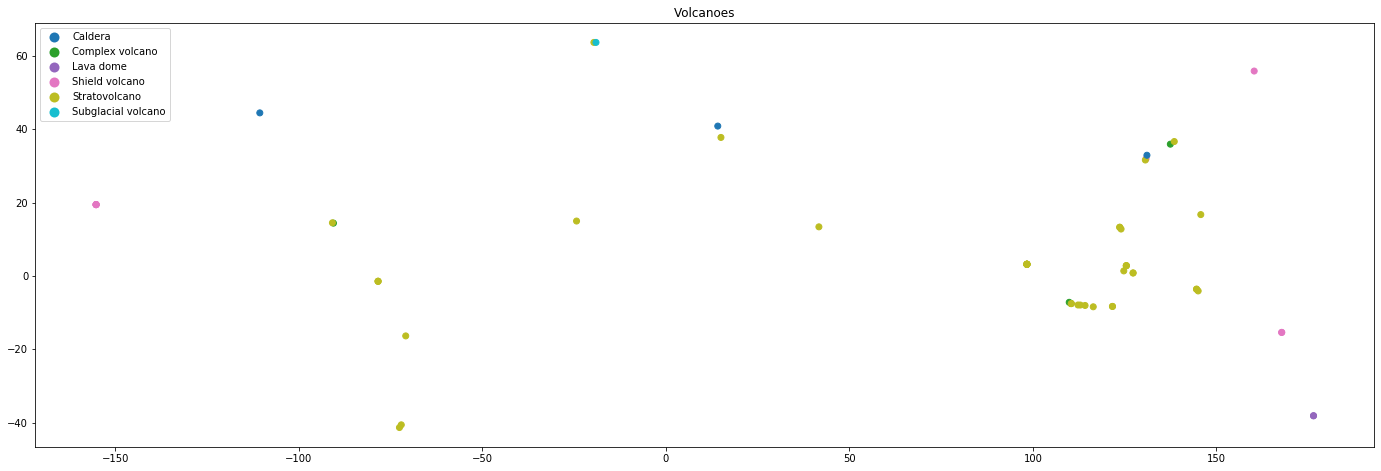

In [9]:
fig, ax = plt.subplots(figsize=(24,18))
gdf.plot(column='Type', ax=ax, legend=True)
plt.title('Volcanoes')

In [71]:
# OpenStreetMap
map = folium.Map(location = [39.605424,2.755646], tiles='OpenStreetMap' , zoom_start = 10)
map

In [55]:
#colores soportados por Icon.folium
colorMap = ['gray', 'blue', 'orange', 'red', 'darkgreen', 'pink', 'white', 'beige', 'green', 'darkred', 'lightgray', 'cadetblue', 'darkblue', 'lightred', 'lightblue', 'black', 'darkpurple', 'purple', 'lightgreen']
typeColorMap = dict(zip(np.unique(df["Type"]),range(len(np.unique(df["Type"])))))

print(colorMap[typeColorMap["Caldera"]])

gray


In [72]:
map =  folium.Map(location = [13.406,80.110], tiles='OpenStreetMap' , zoom_start = 2)

for _,item in gdf.iterrows():
    coord = [item["Latitude"],item["Longitude"]]
    type_color =colorMap[typeColorMap[item["Type"]]]        
    map.add_child(folium.Marker(location = coord,
        popup = "Name: " + item["Name"] + '<br>' +
                "Country: " + item["Country"] + '<br>'
                "Type: " + item["Type"] + '<br>'
                "Coordinates: (%f,%f) "%(coord[0],coord[1]),
                icon = folium.Icon(color = type_color)))           

In [57]:
map

El anterior ejemplo está inspirado en el código: 
https://github.com/geopandas/geopandas/blob/master/doc/source/gallery/plotting_with_folium.ipynb
Echad un vistazo al bucle generador de marcas.

## Otro ejemplo

In [73]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

###### COPY FROM 
###### https://stackoverflow.com/questions/11105663/how-to-extract-gpx-data-with-python
GPXfile="trajectory-sample.gpx"
data = open(GPXfile).read()

lat = np.array(re.findall(r'lat="([^"]+)',data),dtype=float)
lon = np.array(re.findall(r'lon="([^"]+)',data),dtype=float)
time = re.findall(r'<time>([^\<]+)',data)
######
###### BEST: https://pypi.org/project/gpxpy/

In [148]:
df = pd.DataFrame({"lat":lat,"lon":lon})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

mymap = folium.Map(location=[df.lat.mean(), df.lon.mean() ], zoom_start=10, tiles=None)
folium.TileLayer("openstreetmap", name="OpenStreet Map").add_to(mymap)

In [149]:
points =  np.column_stack((lat,lon))
points 

array([[39.540317,  2.446758],
       [39.540389,  2.447098],
       [39.540582,  2.44755 ],
       ...,
       [39.54063 ,  2.446776],
       [39.540997,  2.446828],
       [39.540997,  2.446828]])

In [150]:
#https://python-visualization.github.io/folium/modules.html
folium.PolyLine(points, color='blue', weight=3, opacity=.5).add_to(mymap)

In [151]:
#https://python-visualization.github.io/folium/modules.html
folium.vector_layers.CircleMarker(location=[points[0][0],points[0][1]], radius=9, color="white", weight=1, fill_color="green", fill_opacity=1).add_to(mymap) 

In [152]:
mymap

## <span style="color:blue">Actividad </span>
Dibuja en el mapa con un triangulo la posición de la zona más elevada ayudandote del código siguiente:

In [ ]:
maxEle = [0,0] #encontrar dichas coordenadas

#Triángulo
folium.RegularPolygonMarker(location=[maxEle[0],maxEle[1]],fill_color="gray", fill_opacity=1, color="black", number_of_sides=3, radius=20, rotation=30).add_to(mymap)

#map plotting
mymap

## Un poco de todo

In [157]:
from shapely.geometry import Polygon, LineString, Point
airport = Point(39.551143,2.732997)

In [158]:
#Distancia de todos los puntos a ese punto
gdf.distance(airport)

0       52.263890
1       52.263699
2       52.263514
3       52.263301
4       52.263349
          ...    
3135    52.263371
3136    52.263749
3137    52.264098
3138    52.264319
3139    52.264319
Length: 3140, dtype: float64

In [159]:
gdf.distance(airport).mean()

52.24673429927974

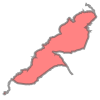

In [176]:
poly = Polygon(gdf.geometry)
poly

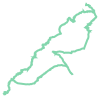

In [177]:
poly.boundary

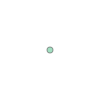

In [178]:
poly.centroid

https://geopandas.readthedocs.io/en/latest/getting_started/introduction.html?highlight=Polygon#Getting-polygon-boundary-and-centroid


# QGIS con Python